In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# House prices project

In this project, from the available data on house prices, it is necessary to determine the prices of houses from another sample.

### Loading the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from scipy import stats
from tqdm.notebook import tqdm

from sklearn.preprocessing import LabelEncoder

plt.style.use("seaborn")
#sns.set(font_scale=2.5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.max_rows = 2000
pd.options.display.max_columns = 500

### Loading training data and analyzing

In [3]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

Our train data contains 1460 objects and 81 features. Based on this, the matrix "feature objects" will contain 1460 rows and 80 columns. And the answer matrix will have 1460 rows 1 column. And the test data has 1659 objects and 80 features.

### Now let's define feature types.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Let's count how many empty cells our data has

In [7]:
train.isna().sum().head(100)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Let's depict the data with respect to the features in the entire volume and see what types of features the objects have

In [8]:
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1082,1083,20,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,100.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1459,1459,GasA,Ex,Y,SBrkr,1459,0,0,1459,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,RFn,2,527,TA,TA,Y,192,39,0,0,0,0,NaN,NaN,NaN,0,9,2007,WD,Normal,192000
534,535,60,RL,74.0,9056,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,Gd,Av,Unf,0,Unf,0,707,707,GasA,Ex,Y,SBrkr,707,707,0,1414,0,0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2004.0,Fin,2,403,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,178000
1153,1154,30,RM,NaN,5890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,6,8,1930,2007,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Av,ALQ,538,Unf,0,278,816,GasA,Ex,Y,SBrkr,816,0,0,816,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,2002.0,Unf,1,432,TA,TA,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,120500
453,454,60,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,768,768,GasA,Ex,Y,SBrkr,786,804,0,1590,0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,RFn,2,676,TA,TA,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,210000
349,350,60,RL,56.0,20431,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,870.0,Ex,TA,PConc,Ex,TA,No,GLQ,1410,Unf,0,438,1848,GasA,Ex,Y,SBrkr,1848,880,0,2728,1,0,2,1,4,1,Ex,10,Typ,2,Ex,Attchd,2006.0,Fin,3,706,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,New,Partial,437154


From the preliminary analysis of the data, it can be concluded that the features with the "object" type that have empty cells are associated with the fact that the NaN value related to the feature means that the object does not have this feature. This means that these values must be converted to a categorical type.

### Filling empty values

In [9]:
# Filling categorical values.
for i in train.columns[train.dtypes=='object']:
    train[i].fillna('NA', inplace=True)
    
# Filling float values.
for i in train.columns[train.dtypes=='float64']:
    train[i].fillna(train[i].mean(), inplace=True)

After that, we check our data again

In [10]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [11]:
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1120,1121,30,RM,59.0,8263,Pave,NA,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,6,5,1920,1950,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1012,1012,GasA,TA,Y,FuseA,1012,0,0,1012,0,0,1,0,2,1,TA,6,Typ,1,Gd,Detchd,1920.0,Unf,1,308,TA,TA,Y,0,22,112,0,0,0,NA,MnPrv,NA,0,5,2007,WD,Normal,118400
797,798,20,RL,57.0,7677,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1953,1953,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,570,Unf,0,203,773,GasA,Gd,Y,SBrkr,773,0,0,773,0,0,1,0,2,1,TA,4,Typ,0,NA,Attchd,1953.0,Unf,1,240,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,110000
1425,1426,20,RL,80.0,10721,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1959,1959,Hip,CompShg,HdBoard,HdBoard,Stone,243.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1252,1252,GasA,Ex,Y,SBrkr,1252,0,0,1252,0,0,1,0,3,1,Gd,7,Typ,0,NA,Detchd,1960.0,Unf,2,528,TA,TA,Y,0,39,0,0,0,0,NA,NA,NA,0,10,2008,WD,Normal,142000
931,932,20,RL,70.0,9100,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,338,Rec,466,121,925,GasA,Ex,Y,SBrkr,925,0,0,925,0,1,1,0,2,1,TA,5,Typ,0,NA,Detchd,1965.0,Unf,1,429,TA,TA,Y,0,0,0,0,0,0,NA,GdWo,NA,0,7,2009,WD,Normal,117500
723,724,50,RL,60.0,8172,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,4,6,1954,1972,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,941,941,GasA,Ex,Y,SBrkr,997,473,0,1470,0,0,2,0,4,1,TA,7,Typ,0,NA,Detchd,1958.0,Unf,1,548,TA,TA,Y,0,0,0,0,156,0,NA,NA,NA,0,5,2008,WD,Normal,135000


## Graphical feature analysis with respect to the dependent variable

### Analysis of categorical features

In [12]:
# Create categorical data
df_cat = train.select_dtypes(include ='object')

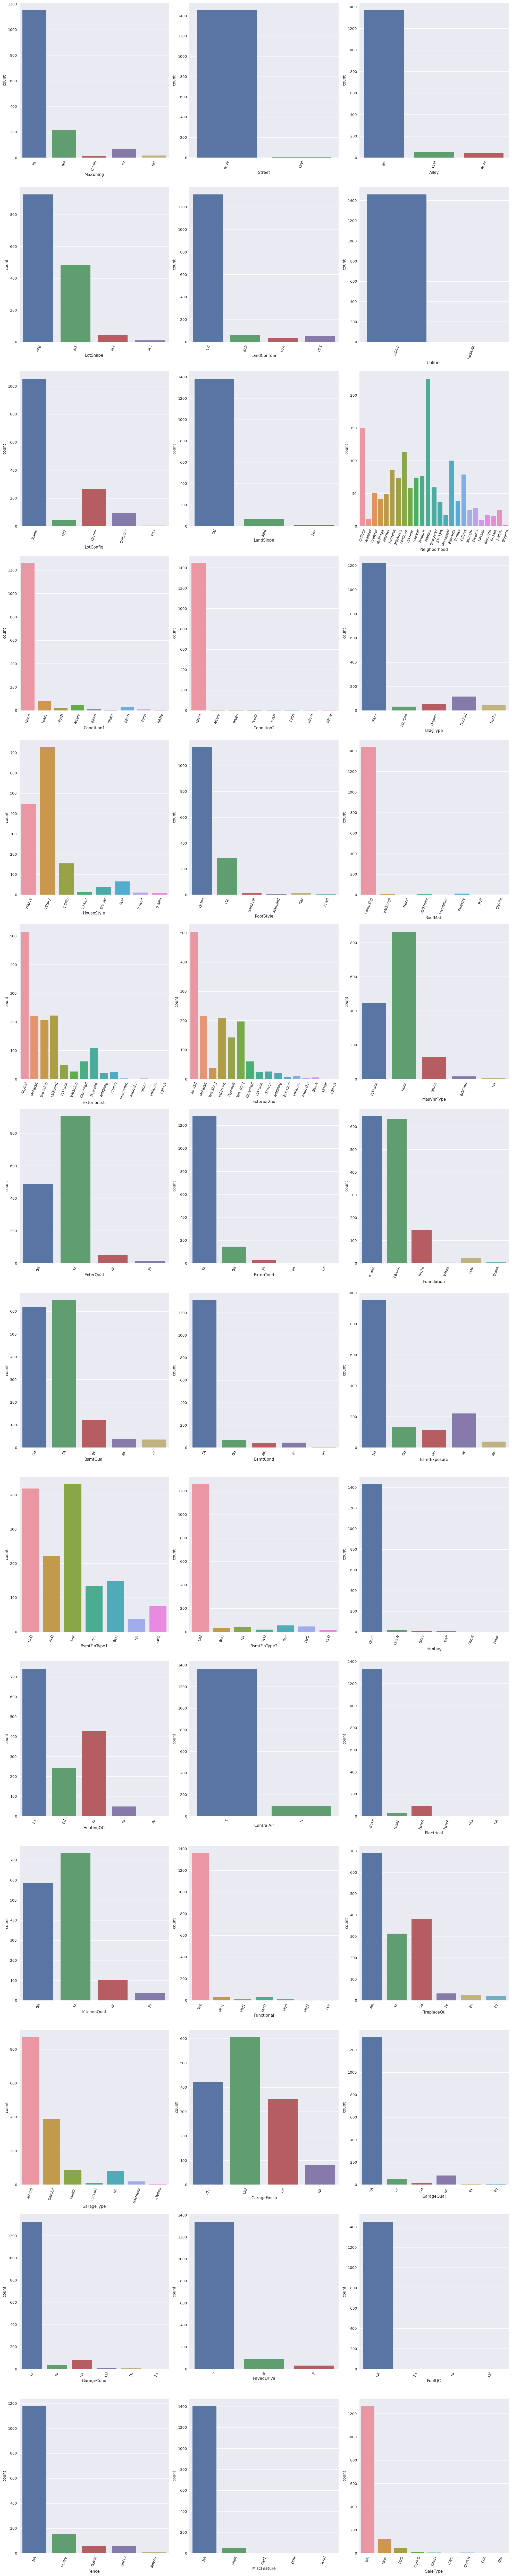

In [13]:
# count the number of values of each feature
fig, axes = plt.subplots(round(len(df_cat.columns) / 3),
                       3, figsize = (20,100))
for i, ax in enumerate(fig.axes):
     if i < len(df_cat.columns):
        ax.set_xticklabels([],rotation=70)
        sns.countplot(x=df_cat.columns[i], data=df_cat, 
                      ax=ax)
fig.tight_layout()

To find dependencies between categorical features and the dependent variable, it is necessary to transform the categorical features into numerical ones and build graphs of these features relative to the dependent feature. We will transform using the LabelEncoder method.

In [14]:
le = LabelEncoder()

for i in df_cat.columns:
    df_cat[i] = le.fit_transform(df_cat[i])

### Let's look at the correlation of features with respect to the dependent variable

In [15]:
# Add dependent variable SalePrice to df _cat
df_cat['SalePrice'] = train['SalePrice']

# Then calculating correlation
df_cat_corr= df_cat.corr()['SalePrice'][:-1]
print(df_cat_corr)
df_cat_hicorr = df_cat_corr[abs(df_cat_corr)>0.4]
print()
print('Categorical features wiht high correllation score')
print(df_cat_hicorr)

MSZoning        -0.166872
Street           0.041036
Alley            0.083121
LotShape        -0.255580
LandContour      0.015453
Utilities       -0.014314
LotConfig       -0.067396
LandSlope        0.051152
Neighborhood     0.210851
Condition1       0.091155
Condition2       0.007513
BldgType        -0.085591
HouseStyle       0.180163
RoofStyle        0.222405
RoofMatl         0.132383
Exterior1st      0.103551
Exterior2nd      0.103766
MasVnrType      -0.075943
ExterQual       -0.636884
ExterCond        0.117303
Foundation       0.382479
BsmtQual        -0.593734
BsmtCond         0.091503
BsmtExposure    -0.294589
BsmtFinType1    -0.098734
BsmtFinType2     0.072717
Heating         -0.098812
HeatingQC       -0.400178
CentralAir       0.251328
Electrical       0.237044
KitchenQual     -0.589189
Functional       0.115328
FireplaceQu     -0.097176
GarageType      -0.415283
GarageFinish    -0.425684
GarageQual       0.205963
GarageCond       0.246705
PavedDrive       0.231357
PoolQC      

### Now let's see the distribution of feature values relative to SalePrice

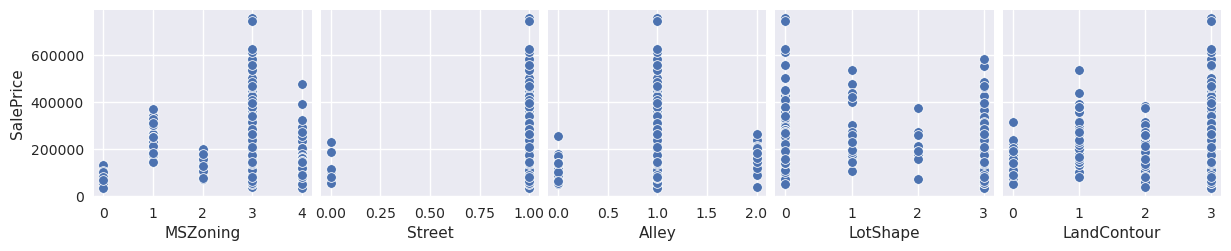

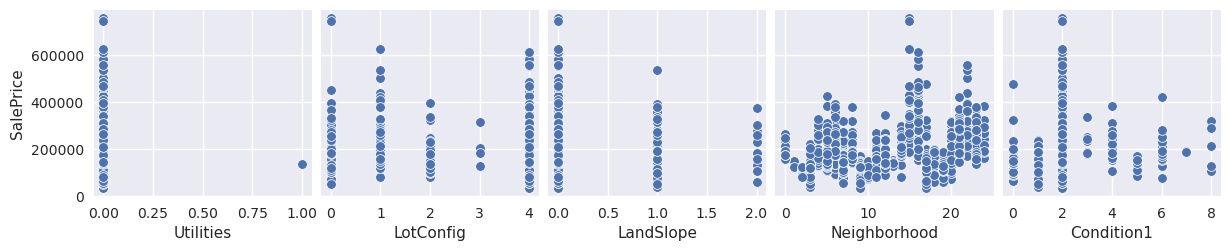

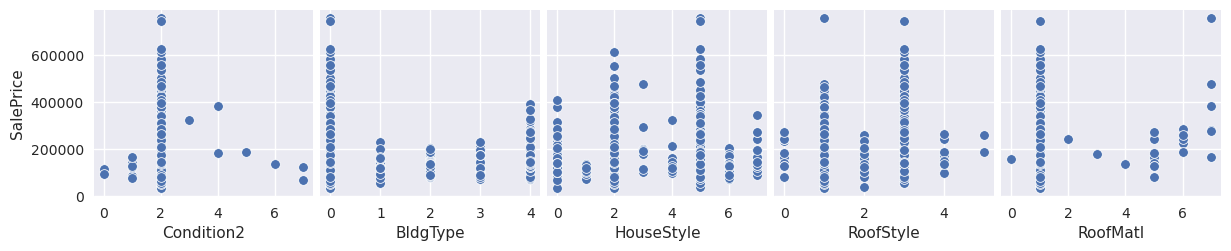

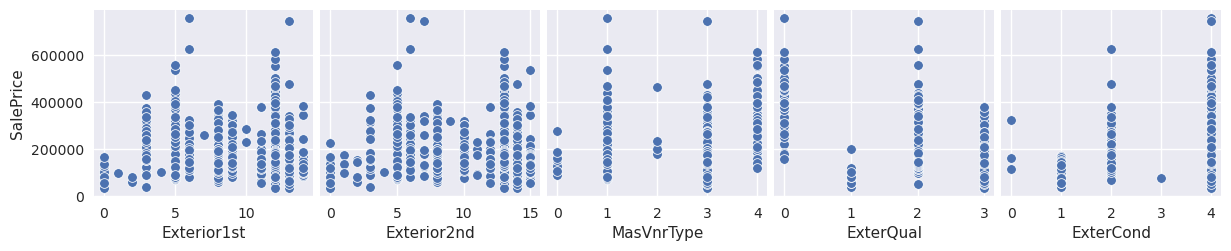

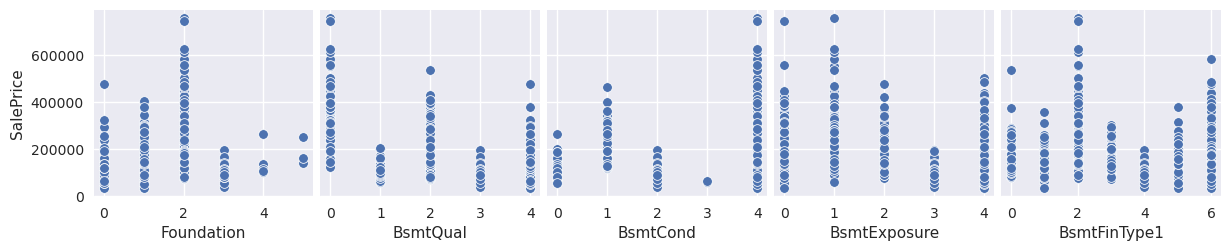

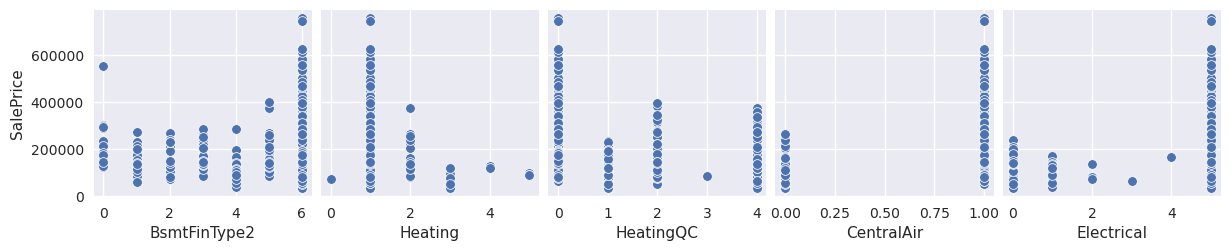

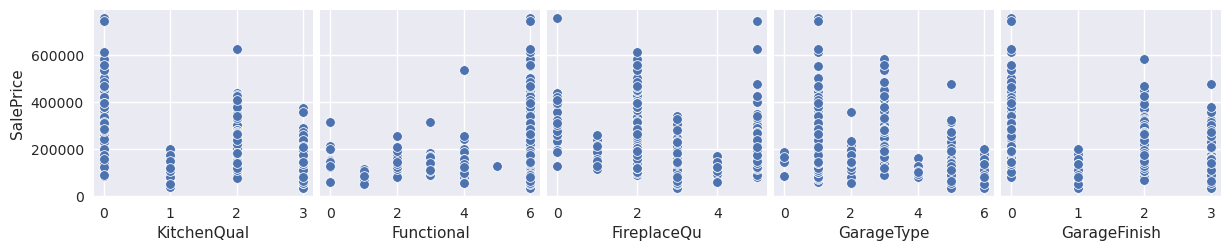

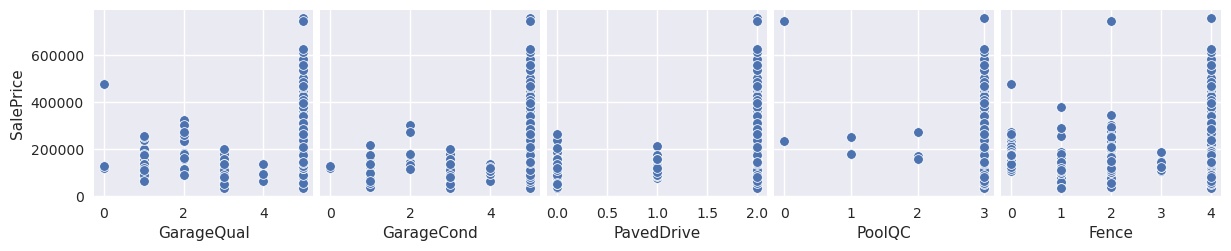

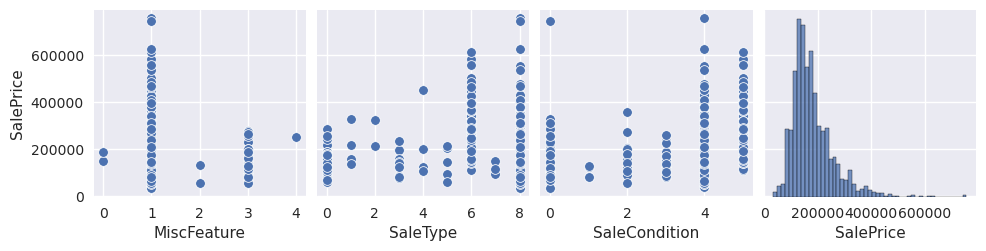

In [16]:
for i in range(0, len(df_cat.columns), 5):
    sns.pairplot(data=df_cat,
                x_vars=df_cat.columns[i:i+5],
                y_vars=['SalePrice'])

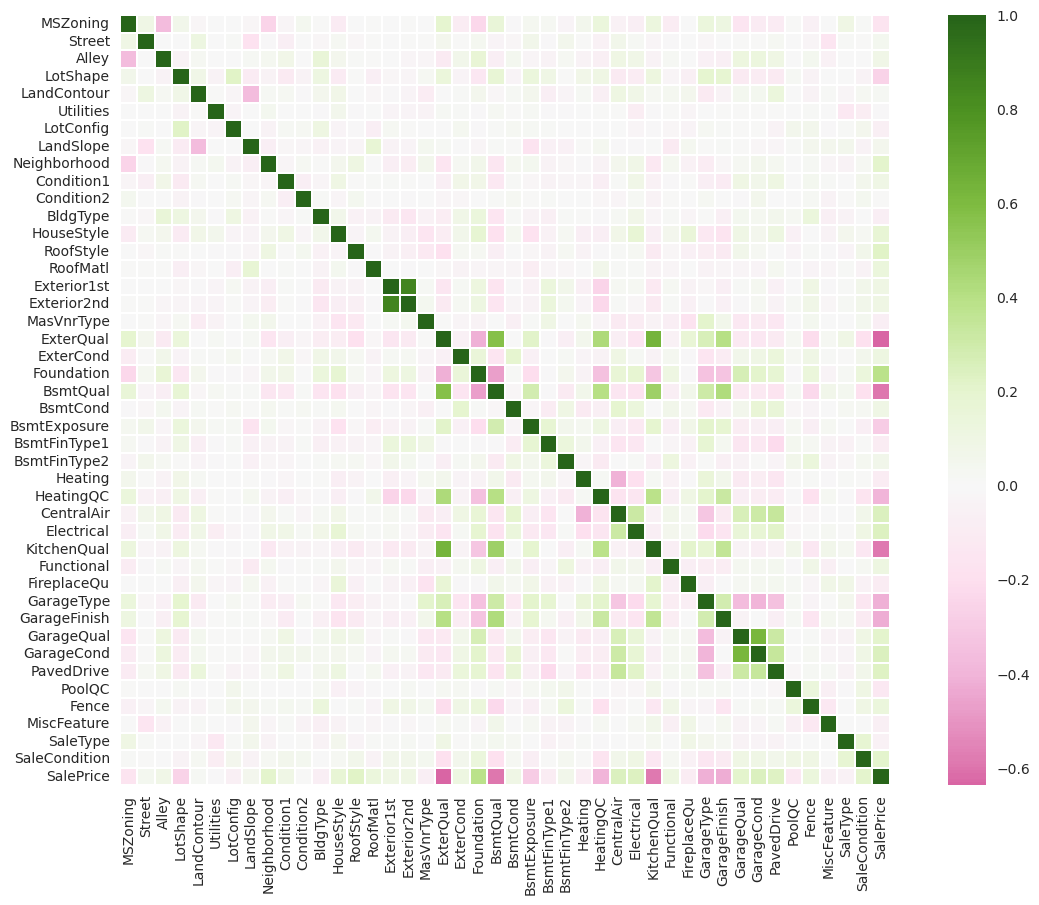

In [17]:
plt.figure(figsize=(15, 10))

sns.heatmap(df_cat.corr(), cmap="PiYG", center=0,
            annot_kws={"size": 8}, fmt='.1f', linewidths=0.1, square=True);

fig.tight_layout()

### Analysis of numerical features

In [18]:
# Create numerical data
df_num = train.select_dtypes(include=['float64', 'int64'])
df_num = df_num.drop('Id', axis='columns')

In [19]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

### Let's build a histogram of features

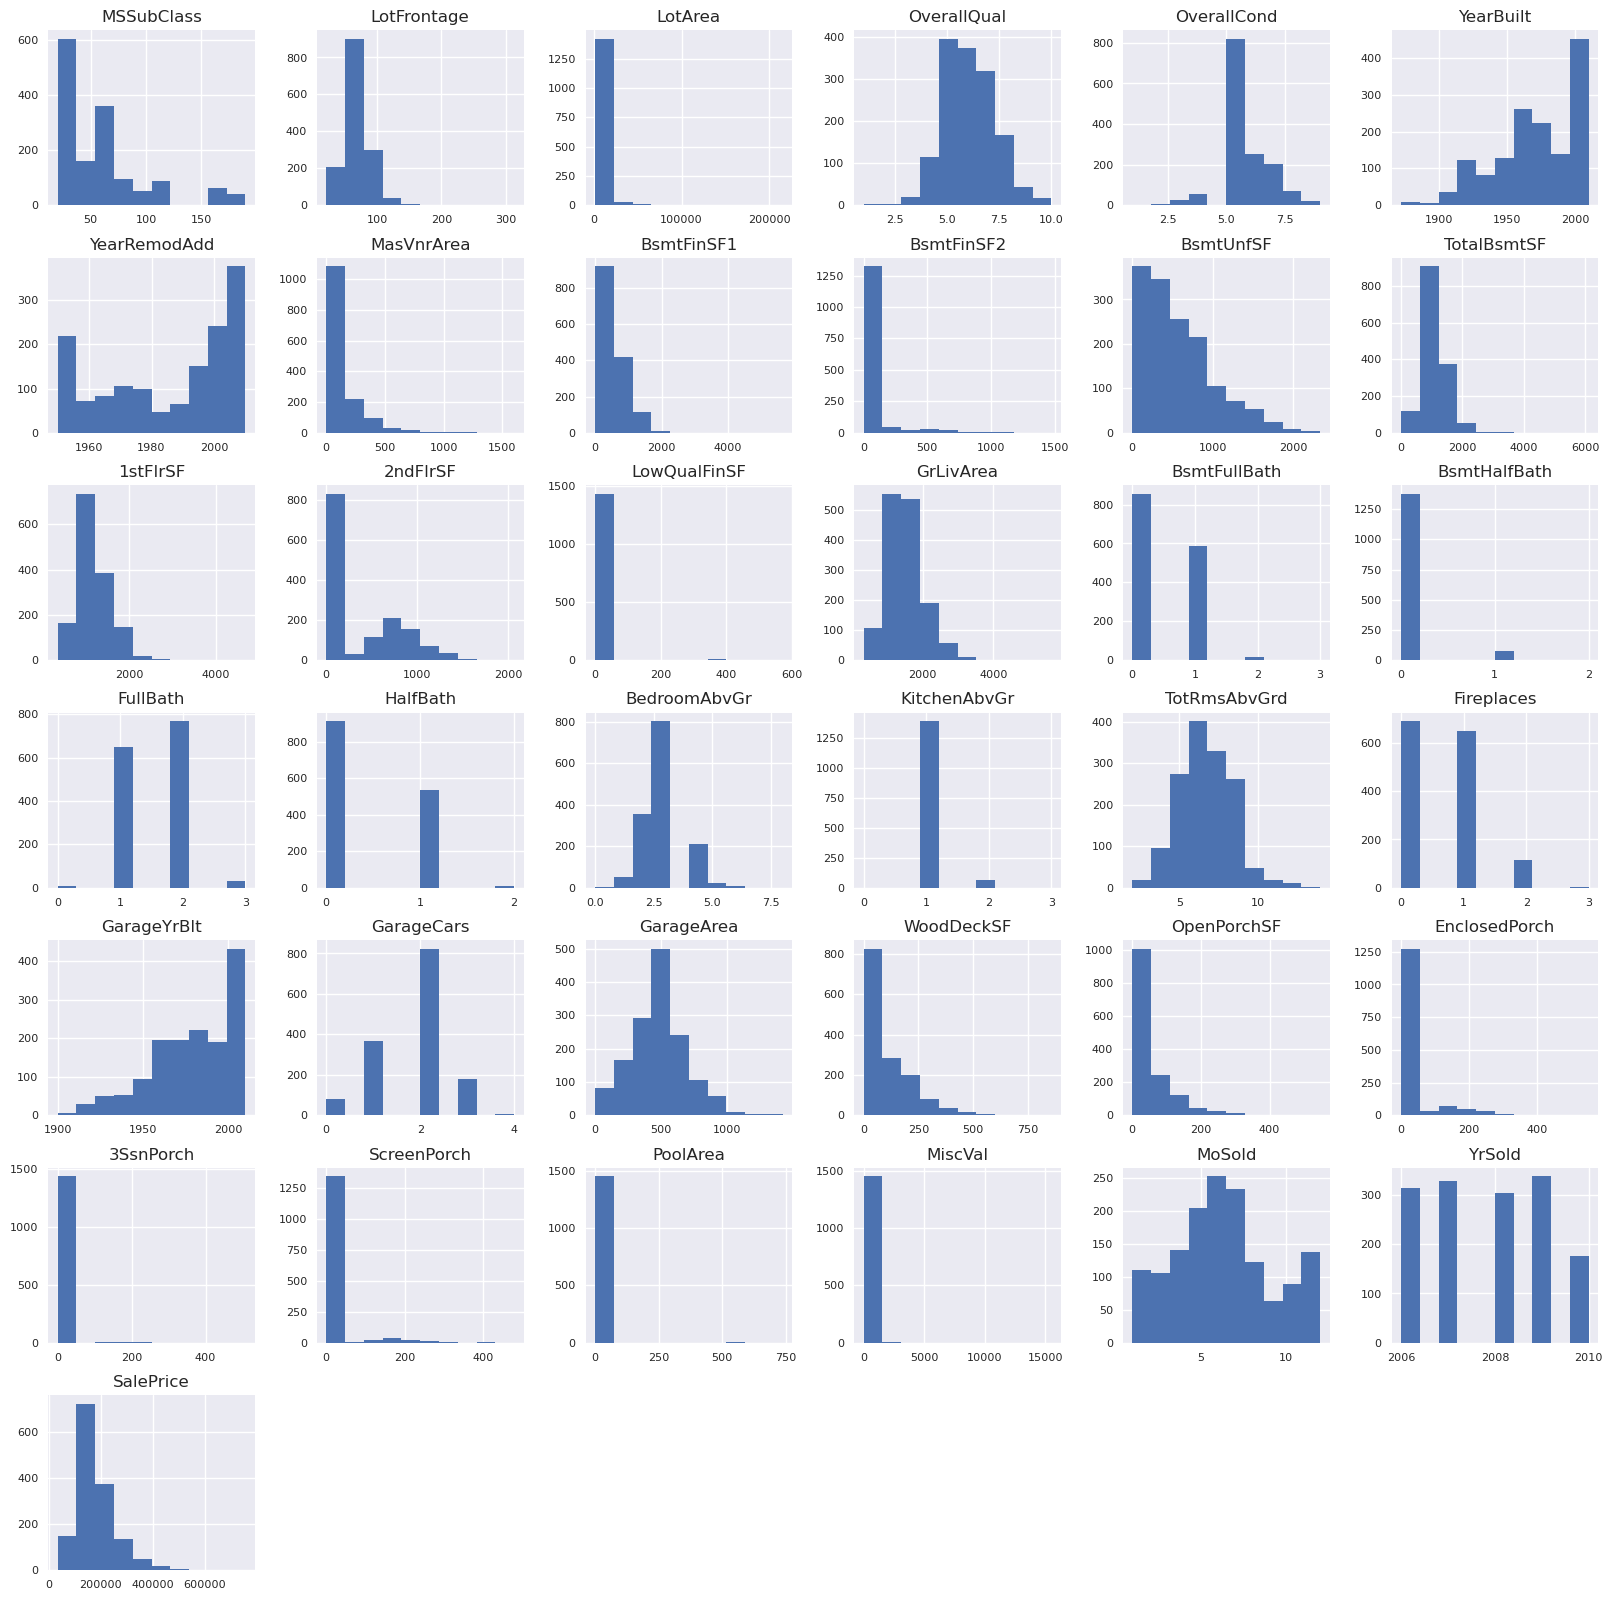

In [20]:
df_num.hist(figsize=(20, 20), xlabelsize=8, ylabelsize=8);

### Check the correlation of numerical features with respect to SalePrice

In [21]:
# Then calculating correlation
df_num_corr= df_num.corr()['SalePrice'][:-1]
print(df_num_corr)

df_num_hicorr = df_num_corr[abs(df_num_corr)>0.5]
print()

print('Numerical features with high correllation score')
print(df_num_hicorr)

MSSubClass      -0.084284
LotFrontage      0.334901
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.470177
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

Numerical features with high co

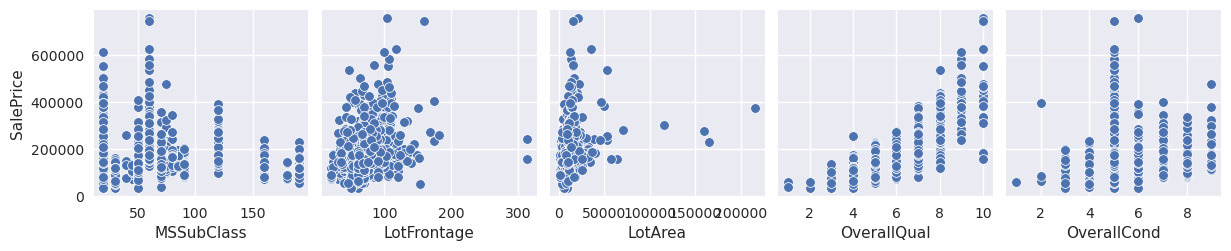

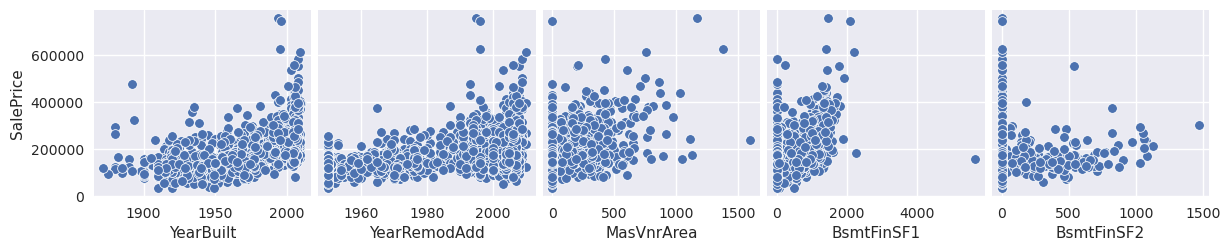

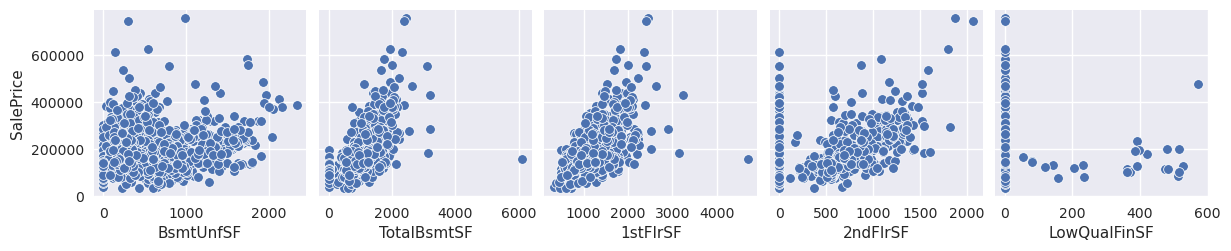

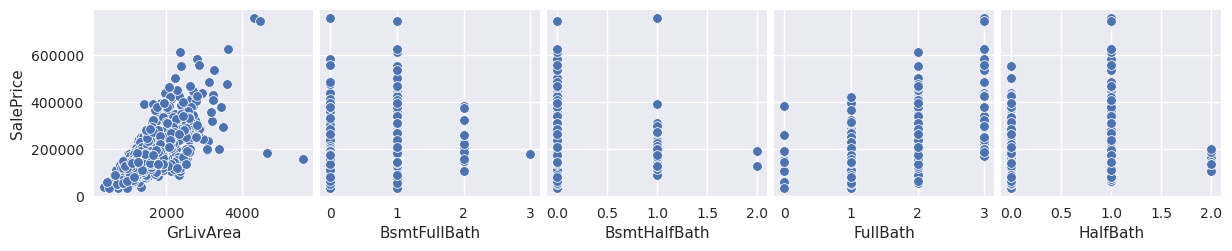

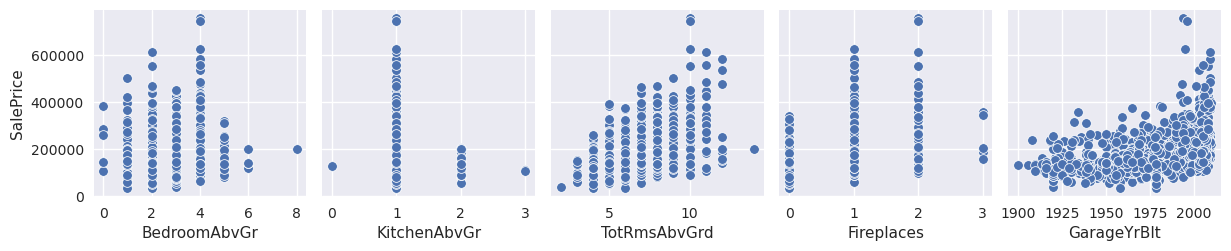

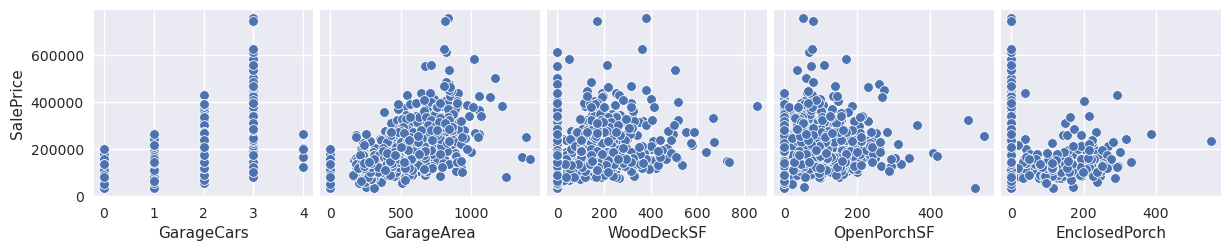

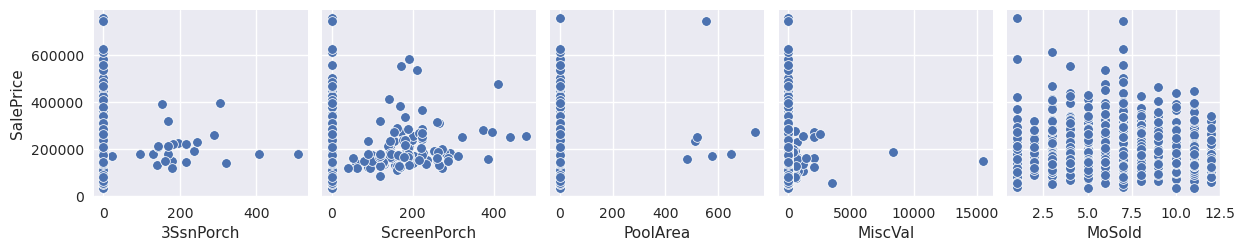

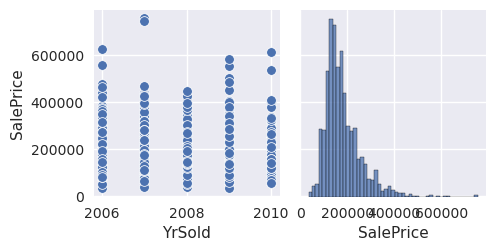

In [22]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

### And finally, we will build a correlation map of numerical features

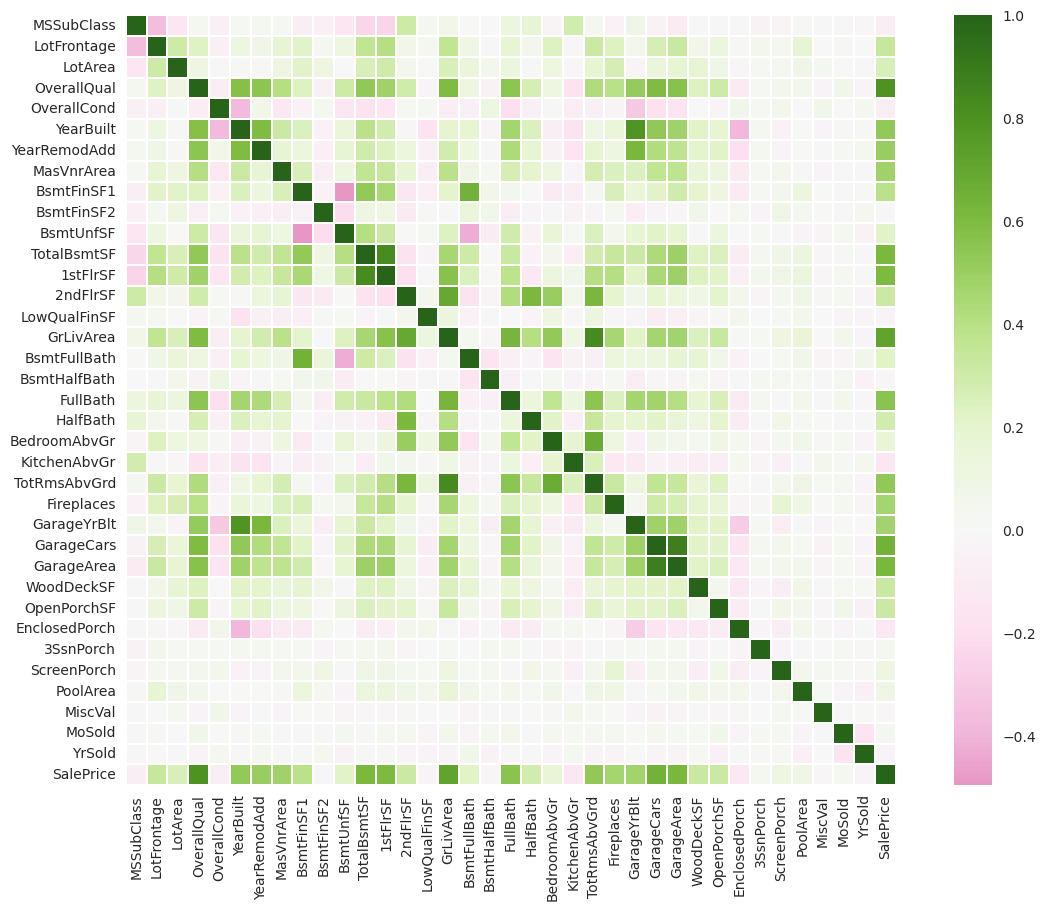

In [23]:
plt.figure(figsize=(15, 10))

sns.heatmap(df_num.corr(), cmap="PiYG", center=0,
            annot_kws={"size": 8}, fmt='.1f', linewidths=0.1, square=True);

fig.tight_layout()

### And at the end of this section, we analyse SalePrice

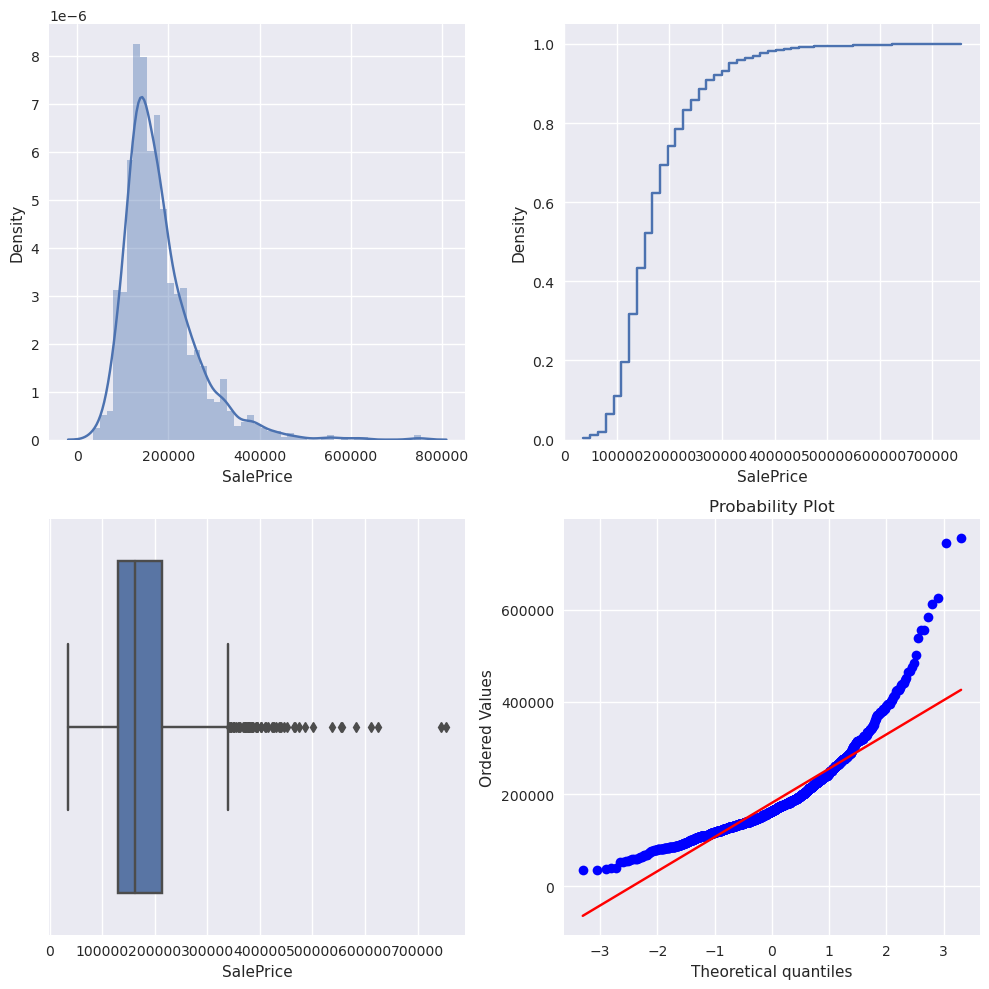

In [24]:
fig, ax = plt.subplots(2,2, figsize =(10, 10))

sns.distplot(train['SalePrice'], kde=True, ax=ax[0,0])
sns.histplot(train['SalePrice'], cumulative=True, 
             stat="density", common_norm=False, 
             element="step", fill=False, ax=ax[0,1])
sns.boxplot(x=train['SalePrice'], ax=ax[1,0])
stats.probplot(train['SalePrice'], plot=ax[1,1])
fig.tight_layout()
plt.show()

### Let's build those upper charts by taking the logarithm of SalePrice

In [25]:
SalePrice_log = np.log(train['SalePrice'])

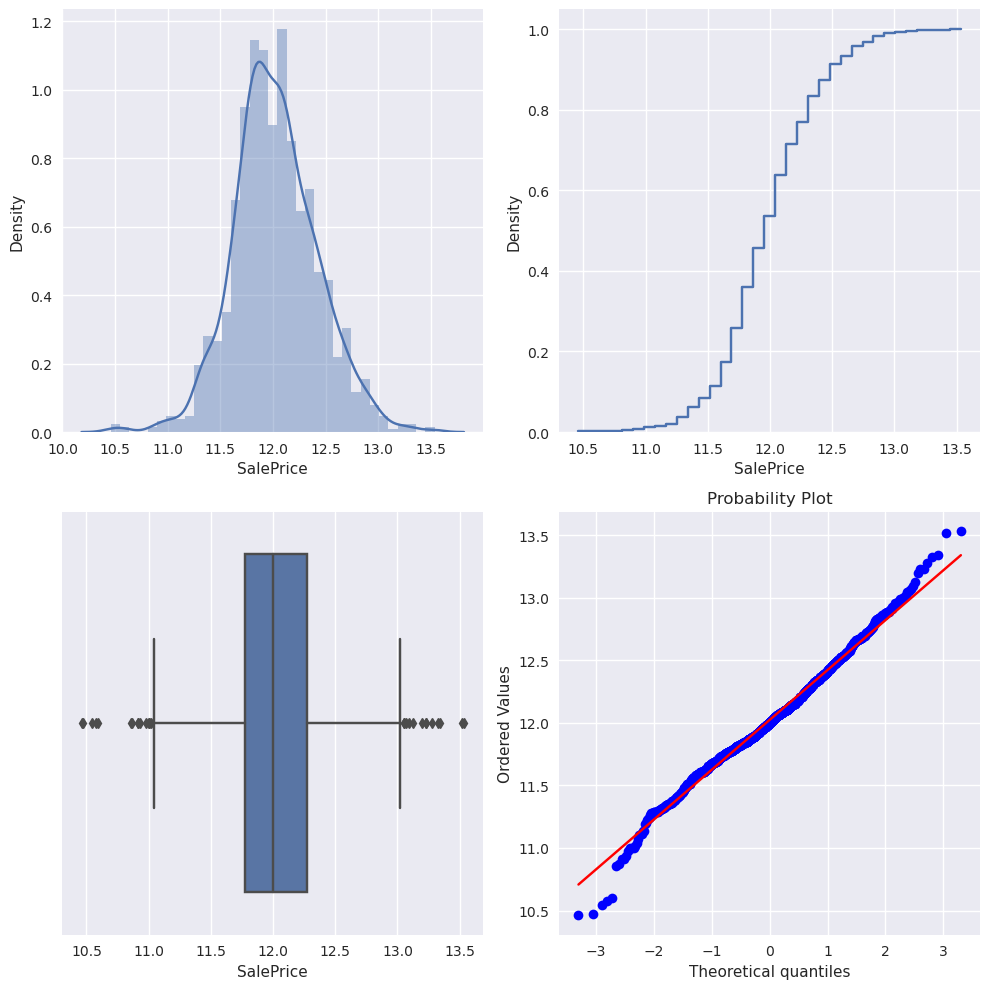

In [26]:
fig, ax = plt.subplots(2,2, figsize =(10, 10))

sns.distplot(SalePrice_log, kde=True, ax=ax[0,0])
sns.histplot(SalePrice_log, cumulative=True, 
             stat="density", common_norm=False, 
             element="step", fill=False, ax=ax[0,1])
sns.boxplot(x=SalePrice_log, ax=ax[1,0])
stats.probplot(SalePrice_log, plot=ax[1,1])
fig.tight_layout()
plt.show()

## Data preprocessing

In [27]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

### In this section, we will prepare the data for machine learning.

In [28]:
# Filling categorical and float values of the train data.

for i in train.columns[train.dtypes=='object']:
    train[i].fillna('NA', inplace=True)
    
for i in train.columns[train.dtypes=='float64']:
    train[i].fillna(train[i].mean(), inplace=True)

In [29]:
# Filling categorical and float values of the test data.

for i in test.columns[test.dtypes=='object']:
    test[i].fillna('NA', inplace=True)
    
for i in test.columns[test.dtypes=='float64']:
    test[i].fillna(test[i].mean(), inplace=True)

We create temporary columns to combine train data and test data in order to create a vector array.

In [30]:
train['train_test'] = 1
test['train_test'] = 0
all_data = pd.concat([train,test])

In [31]:
all_data.shape

(2919, 82)

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [33]:
all_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [34]:
all_data.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
1260,2721,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,758.0,Unf,0.0,293.0,1051.0,GasA,Gd,Y,SBrkr,1051,0,0,1051,1.0,0.0,1,0,3,1,TA,6,Typ,0,NA,Attchd,1968.0,RFn,2.0,504.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,7,2006,WD,Normal,NaN,0
400,1861,90,RL,64.0,7007,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1513,0,0,1513,0.0,0.0,2,0,4,2,TA,8,Typ,0,NA,Attchd,1979.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2009,WD,Alloca,NaN,0
176,177,60,RL,97.0,10029,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,ClearCr,Norm,Norm,1Fam,2Story,6,5,1988,1989,Gable,CompShg,Plywood,Plywood,BrkFace,268.0,Gd,TA,PConc,Gd,TA,No,GLQ,831.0,Unf,0.0,320.0,1151.0,GasA,TA,Y,SBrkr,1164,896,0,2060,0.0,1.0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1988.0,Unf,2.0,521.0,TA,TA,Y,0,228,0,0,192,0,NA,NA,NA,0,9,2007,WD,Normal,211000.0,1
885,2346,20,FV,72.0,8640,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24.0,Unf,0.0,1314.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2007.0,RFn,2.0,598.0,TA,TA,Y,0,141,0,0,0,0,NA,NA,NA,0,11,2007,New,Partial,NaN,0
1183,2644,160,RM,24.0,2160,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,BrkFace,200.0,TA,TA,CBlock,TA,TA,No,LwQ,402.0,Unf,0.0,363.0,765.0,GasA,Gd,Y,SBrkr,765,600,0,1365,0.0,0.0,1,1,3,1,Gd,7,Min1,1,Fa,Attchd,1973.0,Unf,2.0,440.0,TA,TA,Y,0,36,0,0,0,0,NA,NA,NA,0,6,2006,WD,Normal,NaN,0
588,2049,90,RL,72.0,11072,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1728.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,0.0,0.0,2,0,6,2,TA,10,Typ,0,NA,Detchd,1987.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,11,2008,WD,Normal,NaN,0
618,619,20,RL,90.0,11694,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2007,2007,Hip,CompShg,CemntBd,CmentBd,BrkFace,452.0,Ex,TA,PConc,Ex,TA,Av,GLQ,48.0,Unf,0.0,1774.0,1822.0,GasA,Ex,Y,SBrkr,1828,0,0,1828,0.0,0.0,2,0,3,1,Gd,9,Typ,1,Gd,Attchd,2007.0,Unf,3.0,774.0,TA,TA,Y,0,108,0,0,260,0,NA,NA,NA,0,7,2007,New,Partial,314813.0,1
256,257,60,FV,64.0,8791,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,6,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Rec,503.0,Unf,0.0,361.0,864.0,GasA,Ex,Y,SBrkr,864,864,0,1728,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NA,Attchd,2003.0,RFn,2.0,673.0,TA,TA,Y,216,56,0,0,0,0,NA,NA,NA,0,5,2008,WD,Normal,207500.0,1
141,142,20,RL,78.0,11645,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1300.0,Unf,0.0,434.0,1734.0,GasA,Ex,Y,SBrkr,1734,0,0,1734,1.0,0.0,2,0,3,1,Gd,7,Typ,0,NA,Attchd,2005.0,Fin,2.0,660.0,TA,TA,Y,160,24,0,0,0,0,NA,NA,NA,0,1,2006,WD,Normal,260000.0,1
323,1784,70,RL,80.0,8146,Pave,NA,Reg,Lvl,AllPub,Cor

### Create a vector array

In [35]:
Vector_array = all_data.drop(['Id', 'SalePrice'], axis=1)

In [36]:
Vector_array = pd.get_dummies(Vector_array)
Vector_array.shape

(2919, 312)

In [37]:
Vector_array.sample(15)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,train_test,MSZoning_C (all),MSZoning_FV,MSZoning_NA,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NA,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_NA,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_NA,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_NA,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_NA,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,Garag

In [38]:
X = Vector_array[Vector_array.train_test==1].drop(['train_test'], axis=1)
X.shape

(1460, 311)

In [39]:
a = Vector_array[Vector_array.train_test==0].drop(['train_test'], axis=1)
a.shape

(1459, 311)

In [40]:
y = all_data[all_data.train_test==1].SalePrice
y.shape

(1460,)

## Building a Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
X_train.shape

(1168, 311)

In [44]:
X_test.shape

(292, 311)

In [45]:
y_train.shape

(1168,)

In [46]:
y_test.shape

(292,)

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Train score: ', lr.score(X_train, y_train))
print('Test score: ', lr.score(X_test, y_test))

Train score:  0.9436898398543214
Test score:  0.7821130981144048


In [48]:
params = {
    'fit_intercept': [True,False]
        }

lr = LinearRegression()
lr_grid = GridSearchCV(lr, cv=10, param_grid=params, verbose=True, n_jobs=-1)
lr_grid.fit(X_train, y_train)
print(lr_grid.best_score_)
print(lr_grid.best_estimator_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
0.6260735287301399
LinearRegression(fit_intercept=False)


In [49]:
lr_best = lr_grid.best_estimator_
print("Train scores: ", lr_best.score(X_train, y_train))
print("Test scores: ", lr_best.score(X_test, y_test))

Train scores:  0.9436898398543213
Test scores:  0.7821925589051842


In [50]:
y_predict = lr_best.predict(a)
Id = test['Id']

In [51]:
submission = pd.DataFrame({'Id': Id, 'SalePrice': y_predict})

In [52]:
submission.to_csv('/kaggle/working/submission.csv', index=False)
submission.shape

(1459, 2)